In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = '../../knowledgebase/evaluated_samples.jsonl'

In [3]:
with open(file_path, 'r') as file:
    df = pd.read_json(file, lines = True)

In [4]:
df.sample(5)

,id,query,gt_answer,scores,label,best_answer
9133,4c67f74a-ea96-44b3-80e4-9834c5dede04,I'm interested in learning about the challenge...,Sure! One of the central challenges in sheet-b...,"{'dense': 0.856802403926849, 'sparse': 0.84530...",dense,sheet-bulk metal forming is a critical area in...
8178,dfdf7650-a86e-4bb9-91f5-afed0047ae50,What can you tell me about the academic progra...,"FAU, or Friedrich-Alexander-Universität Erlang...","{'dense': 0.8405245542526241, 'sparse': 0.8709...",sparse,"based on the retrieved documents, i couldn't f..."
207,833b595c-1ef2-4437-987a-3f0cf8f1a279,I'm interested in pursuing a PhD in Wirtschaft...,To apply for a promotion in Wirtschaftspsychol...,"{'dense': 0.8404690623283381, 'sparse': 0.8418...",hybrid,to pursue a phd in wirtschaftspsychologie (bus...
9102,9e13adbc-1e0c-42db-b024-34f4f8696558,What were some of the notable research topics ...,"In 2018, FAU researchers explored various topi...","{'dense': 0.8987155556678771, 'sparse': 0.8761...",dense,"in 2018, notable research topics in computer s..."
7436,2db6b6ae-a8a4-436d-a8e2-f7c63315c3f5,I'm interested in the topic of 'Scheitern in d...,Certainly! The book 'Scheitern in den Wissensc...,"{'dense': 0.7983876466751091, 'sparse': 0.8630...",hybrid,"the topic of ""scheitern in den wissenschaften""..."


In [5]:
df.label.nunique()

3

In [6]:
df.label.value_counts()

label
sparse    4403
dense     2952
hybrid    2805
Name: count, dtype: int64

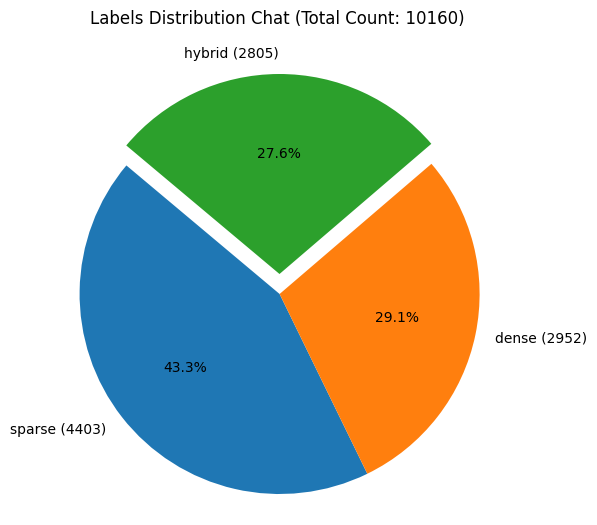

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['label'].value_counts()
total_count = label_counts.sum()

labels_with_counts = [f'{label} ({count})' for label, count in label_counts.items()]

plt.figure(figsize=(6, 6))
plt.pie(
    label_counts,
    labels=labels_with_counts,
    autopct='%1.1f%%',
    startangle=140,
    explode=(0, 0, 0.1)  # Emphasize the 'sparse' slice
)
plt.title(f'Labels Distribution Chat (Total Count: {total_count}) \n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [8]:
label_map = {
    "dense": 0,
    "sparse": 1,
    "hybrid": 2
}

df['label_encoded'] = df['label'].map(label_map)

In [9]:
df.sample(5)

,id,query,gt_answer,scores,label,best_answer,label_encoded
57,02988270-aae6-4b0a-b843-62ab836ac7b8,What can you tell me about the impact of the R...,The Russian-Ukrainian conflict has had a signi...,"{'dense': 0.8517134189605711, 'sparse': 0.8477...",dense,the impact of the russian-ukrainian conflict o...,0
6774,dd58e785-accb-4d6a-b54a-18515f264421,I'm interested in taking some courses from the...,"Yes, all courses from the area of key qualific...","{'dense': 0.7795991897583001, 'sparse': 0.8473...",sparse,"based on the provided documents, there is no d...",1
6180,d59b95d1-6ed2-4743-af77-8fcf7ff78d00,What is Verhaltensbezogene Bewegungstherapie (...,Verhaltensbezogene Bewegungstherapie (VBT) is ...,"{'dense': 0.796396791934967, 'sparse': 0.79529...",hybrid,verhaltensbezogene bewegungstherapie (vbt) ist...,2
1445,496d663b-0c9f-4894-8cd4-2536a8f58cbd,Can you tell me more about the structure of th...,Sure! The Master's program in Nanotechnology a...,"{'dense': 0.8360371589660641, 'sparse': 0.8472...",sparse,"i'm sorry, but the retrieved documents do not ...",1
7517,f3bc0349-f227-49c5-95b7-2f3baaa2b7ba,What factors influence primary school students...,Primary school students' participation in musi...,"{'dense': 0.8415420055389401, 'sparse': 0.8681...",sparse,the retrieved documents do not directly addres...,1


In [10]:
df['dense_score'] = df['scores'].apply(lambda x: x.get('dense'))
df['sparse_score'] = df['scores'].apply(lambda x: x.get('sparse'))
df['hybrid_score'] = df['scores'].apply(lambda x: x.get('hybrid'))

In [11]:
df.sample(5)

,id,query,gt_answer,scores,label,best_answer,label_encoded,dense_score,sparse_score,hybrid_score
3878,37c2c7de-0c23-4c17-9bee-1020852e0063,I've heard about some groundbreaking medical t...,Absolutely! FAU (Friedrich-Alexander-Universit...,"{'dense': 0.8784233331680291, 'sparse': 0.8738...",dense,fau (friedrich-alexander-universität erlangen-...,0,0.878423,0.873825,0.867219
2025,7c1b0e54-c19d-44e3-abfe-0d72a943c4aa,"Hi, I heard there's some issue with a building...","Yes, there has been an incident at the buildin...","{'dense': 0.8641720414161681, 'sparse': 0.8809...",sparse,"based on the retrieved documents, there is no ...",1,0.864172,0.880989,0.870333
9423,1ee514d8-094f-4992-ab33-f8785e5423a9,"Hey, I heard there was a cycling contest in Er...","Yes, there was a cycling contest in Erlangen i...","{'dense': 0.8915440440177911, 'sparse': 0.8908...",dense,"i'm sorry, but i couldn't find any information...",0,0.891544,0.890835,0.886446
7931,f4034927-9898-4264-85be-fd817b343ef6,I've been hearing a lot about Muslimfeindlichk...,"Muslimfeindlichkeit, or anti-Muslim sentiment,...","{'dense': 0.88933265209198, 'sparse': 0.876019...",dense,"muslimfeindlichkeit, or hostility towards musl...",0,0.889333,0.876019,0.883166
2955,7b497724-4656-4bd7-bfde-9c85f4ea4cfe,"Hi, I'm curious about Algeria. Can you tell me...",Sure! Algeria is a country in North Africa kno...,"{'dense': 0.848496317863464, 'sparse': 0.89097...",sparse,"i'm sorry, but the retrieved documents do not ...",1,0.848496,0.890978,0.865950


In [12]:
new_column_order = [
    'id',
    'query',
    'dense_score',
    'sparse_score',
    'hybrid_score',
    'gt_answer',
    'best_answer',
    'label',
    'label_encoded'
]

df = df[new_column_order]

In [13]:
df.sample(5)

,id,query,dense_score,sparse_score,hybrid_score,gt_answer,best_answer,label,label_encoded
9364,2542412a-453f-4417-ae9a-e9f3e95a1181,I'm studying at FAU and I'm trying to find mor...,0.864477,0.855281,0.855603,"Sure, the Natural Science Faculty at FAU, also...",the natural science faculty at friedrich-alexa...,dense,0
5185,845bb75e-070c-4ac3-bc1e-e0bf2b81d589,I've heard about an interesting project involv...,0.883158,0.848024,0.877629,Sure! There's a fascinating project underway a...,the historical boat project you've heard about...,dense,0
4581,b36267f0-e1c4-4518-8529-eecf8ac040fd,What are some of the key competence centers at...,0.837065,0.862896,0.848101,FAU has several competence centers that focus ...,"based on the retrieved documents, the informat...",sparse,1
7258,26bee1f5-a618-4fa8-b7aa-85af5f0501b5,I heard FAU has a medical faculty. Can you tel...,0.886141,0.894299,0.914834,"Yes, the Friedrich-Alexander-Universität Erlan...","yes, fau (friedrich-alexander-universität erla...",hybrid,2
9956,0e314c4f-87d1-4856-85bc-e75e26db7b94,I've heard about awards in the field of paleon...,0.909079,0.887237,0.914429,Absolutely! Awards in paleontology are given t...,"certainly! in the field of paleontology, there...",hybrid,2


In [14]:
output_path = '../../knowledgebase/evaluated_encoded_samples.jsonl'
df.to_json(output_path, orient = 'records', lines = True, force_ascii = False)

In [19]:
def calculate_margin(row):
    label = row['label']
    scores = {
        'dense': row['dense_score'],
        'sparse': row['sparse_score'],
        'hybrid': row['hybrid_score']
    }
    winning_score = scores[label]
    other_scores = [v for k, v in scores.items() if k != label]
    max_other = max(other_scores)
    return winning_score - max_other

In [20]:
df['margin'] = df.apply(calculate_margin, axis=1)

In [21]:
threshold = 0.05
df_clear_winners = df[df['margin'] >= threshold].copy()

In [26]:
df_clear_winners[['query', 'label', 'dense_score', 'sparse_score', 'hybrid_score', 'margin']].sort_values(by='margin', ascending=False)
print(f"{len(df_clear_winners)} out of {len(df)} records have a margin ≥ {threshold}.")

162 out of 10160 records have a margin ≥ 0.05.
